# Introduction to modular forms

This notebook is about modular forms. These objects are pervasive in all mathematics: most often, when strange coincidences appear between series expansions that seem completely unrelated, modular forms are usually at the root of the phenomenon.
   
For example, do you know that the number $e^{\pi \sqrt{163}}$ is very close to being integer!?

In [1]:
exp(sqrt(163)*pi).n(110).str(no_sci = 2)

'262537412640768743.99999999999924438'

## Definitions

We are going to meet different objects. Let's start with some definitions.

Over all the notebook $q = e^{i 2 \pi \tau}$.

### Modular group

The modular group is the group $SL_2(\mathbb Z) = \{A \in GL_2(\mathbb Z) | det(A)=1 \}$. 

This group is the group of symmetries of modular forms -- as we will see momentarily.


In [2]:
SL2Z

Modular Group SL(2,Z)

In [3]:
S, T = SL2Z.gens()

# generators
print(S)
print(T)

[ 0 -1]
[ 1  0]
[1 1]
[0 1]


### Congruence subgroups

The conruence subroups are defined as 

$$Ker(SL_2(\mathbb Z) \to SL_2(\mathbb Z/N\mathbb Z)$$

The most famous ones are 
$$\Gamma_0(N)= \{ A \in SL_2(\mathbb Z) | A = ((\star,\star),(0,\star)) \ mod N\}$$
$$\Gamma_1(N)= \{ A \in SL_2(\mathbb Z) | A = ((1,\star),(0,1)) \ mod N\}$$

In [4]:
G0_14 = Gamma0(14)
G0_14.gens()

(
[1 1]  [ 9 -2]  [ 41 -11]  [ 29  -9]  [11 -4]  [-1  0]
[0 1], [14 -3], [ 56 -15], [ 42 -13], [14 -5], [ 0 -1]
)

In [5]:
G0_14.index() # index in SL2Z:  [SL2Z:G0_14]

24

In [6]:
# Gamma1(1) is SL2Z
assert Gamma1(1).index() == 1
assert Gamma1(1) is SL2Z

In [7]:
Gamma1(1).gens()

(
[ 0 -1]  [1 1]
[ 1  0], [0 1]
)

### Modular function

$SL_2(\mathbb Z)$ acts on the upper-half plane $\mathfrak h = {\tau \in \mathbb C | Im(\tau) > 0}$ via

$$((a,b)(c,d)),\tau \mapsto \gamma \cdot \tau=\frac{a \tau + b}{c \tau + d}$$

Modular functions are functions that are invariant under such actions:

$f: \mathfrak h \to \mathbb C $ such that $\forall \gamma \in SL_2(\mathbb Z), f(\tau)=f(\gamma \cdot \tau)$.

The same defintion also applies to *congruence subgroups*.

### Modular forms

Modular forms are formal differential forms, whose domain is again $\mathfrak h$, that are covariant with respect to teh modular symmetry, i.e.

$$f \in M_k, \ f\left(\frac{a \tau + b}{c \tau + d}\right) = (c \tau + d)^kf(\tau)$$

Notice that this is the way to transform a differential form like $f(\tau)d\tau^{k/2}$.

The most famous example of modular forms are Eisenstein series. In particular, two of them are ubiquitous in the theory of elliptic curves:
$$E_4(\tau) = 240  \sum_{(m,n) \in \mathbb Z^2 - (0,0)}\frac{1}{(m + \tau n)^4}$$
$$E_6(\tau) = 504  \sum_{(m,n) \in \mathbb Z^2 - (0,0)}\frac{1}{(m + \tau n)^6}$$


In [8]:
EisensteinForms(1,4, prec=15).gens()

[
1 + 240*q + 2160*q^2 + 6720*q^3 + 17520*q^4 + 30240*q^5 + 60480*q^6 + 82560*q^7 + 140400*q^8 + 181680*q^9 + 272160*q^10 + 319680*q^11 + 490560*q^12 + 527520*q^13 + 743040*q^14 + O(q^15)
]

In [9]:
EisensteinForms(1,6,prec=15).gens()

[
1 - 504*q - 16632*q^2 - 122976*q^3 - 532728*q^4 - 1575504*q^5 - 4058208*q^6 - 8471232*q^7 - 17047800*q^8 - 29883672*q^9 - 51991632*q^10 - 81170208*q^11 - 129985632*q^12 - 187132176*q^13 - 279550656*q^14 + O(q^15)
]

In [10]:
# The most famous example again

E4 = 240*eisenstein_series_qexp(4, 12)
E6 = -504*eisenstein_series_qexp(6, 12)
print(E4)
print(E6)

1 + 240*q + 2160*q^2 + 6720*q^3 + 17520*q^4 + 30240*q^5 + 60480*q^6 + 82560*q^7 + 140400*q^8 + 181680*q^9 + 272160*q^10 + 319680*q^11 + O(q^12)
1 - 504*q - 16632*q^2 - 122976*q^3 - 532728*q^4 - 1575504*q^5 - 4058208*q^6 - 8471232*q^7 - 17047800*q^8 - 29883672*q^9 - 51991632*q^10 - 81170208*q^11 + O(q^12)


The same definition holds also for congruence subgroups.

#### Theorem
The vector space of modular forms of weight $k$ is finite dimensional.

In [11]:
mf = ModularForms(14,4,prec=15)
mf

Modular Forms space of dimension 8 for Congruence Subgroup Gamma0(14) of weight 4 over Rational Field

In [12]:
mf.q_expansion_basis()  # the basis of the vector space

[
q - 2*q^5 - 4*q^6 - q^7 + 8*q^8 - 11*q^9 - 12*q^10 + 12*q^11 + 8*q^12 + 38*q^13 + 12*q^14 + O(q^15),
q^2 - 2*q^5 - 2*q^6 + q^7 - 6*q^8 + 12*q^10 + 4*q^11 + 2*q^13 - 5*q^14 + O(q^15),
q^3 - q^5 - 2*q^6 - q^7 - 4*q^8 + 6*q^9 + 10*q^10 - 6*q^11 + 4*q^12 - 3*q^13 - 2*q^14 + O(q^15),
q^4 - 2*q^5 + q^7 + q^8 - 4*q^10 + 4*q^11 - 2*q^12 + 2*q^13 + 2*q^14 + O(q^15),
1 + 240*q^14 + O(q^15),
q + 28*q^3 - 8*q^4 + 126*q^5 - 72*q^8 + 757*q^9 + 1332*q^11 - 224*q^12 + 2198*q^13 - 2744*q^14 + O(q^15),
q^2 + 9*q^4 + 28*q^6 + 73*q^8 + 126*q^10 + 252*q^12 + 343*q^14 + O(q^15),
q^7 + 8*q^14 + O(q^15)
]

### Cusp forms 

Cusp forms are modular forms that converge to $0$ at cusp points. In the case of $SL_2(\mathbb Z)$, since the only cusp point is at $\infty$, being a cusp form is equivalent to having the first Fourier coefficent $a_0=0$.

### Cusp points

Cusps are the points along the line $x=0$ on the complex plane where the **fundamental domain** (see below) intersects such line. $\infty$ is always a cusp point.

### Fundamental domain

Since modular functions are invariant w.r.t. the modular group (or congruence subgroups), it would make sense to quotient the upper-half plane by the modular group (or congruence subgroup). This quotient is the fundamental domain.

#### Remark

A Fourier expansion of $f$ is an expansion of the form $\sum_i^\infty a_i q^i$. Recall that $q=e^{i 2 \pi \tau}$

In [13]:
SL2Z.cusps()  # cusp points: indeed the fundamental domain does not intersect x=0

[Infinity]

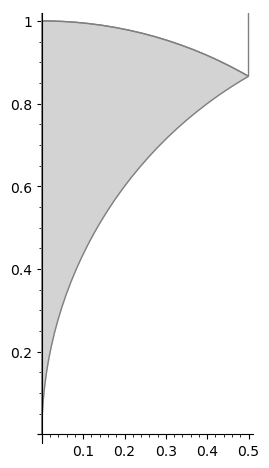

In [14]:
# let's check the fundamental domain
fs = FareySymbol(SL2Z)
fs.fundamental_domain()

Notice that the above picture is not in the standard textbook form: usually one considers the upper area (the white area in the picture above the gray ggeodessic triangle). Nonnetheless the two are both correct and equivalent, as they differ only by the action of the generator $S$ (that would send $0 \mapsto \infty$ and fix the points $|\tau|=1$).

In [15]:
fs.cusps()

[Infinity]

In [16]:
G0_14.cusps()  # the cusps

[0, 1/7, 1/2, Infinity]

In [17]:
# change in convention for the cuss
fs = FareySymbol(G0_14)
fs.cusps()

[0, 1/4, 2/7, Infinity]

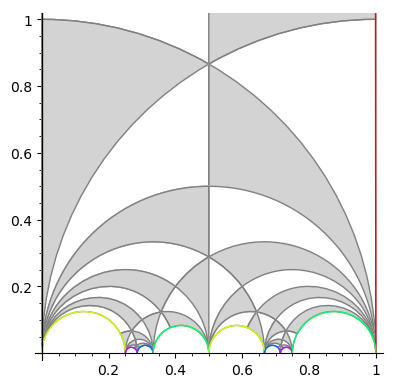

In [18]:
# let's check the fundamental domain
fs.fundamental_domain()

In [19]:
cf = CuspForms(14,4,prec=15)
print(cf)
cf.group()

Cuspidal subspace of dimension 4 of Modular Forms space of dimension 8 for Congruence Subgroup Gamma0(14) of weight 4 over Rational Field


Congruence Subgroup Gamma0(14)

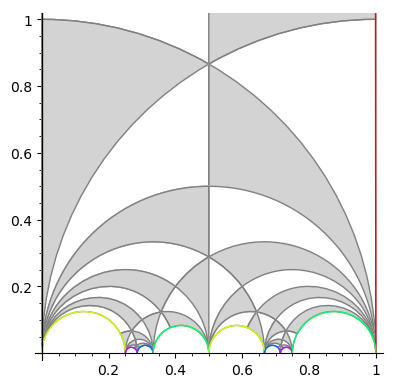

In [20]:
# we can limit ourselves to the subgroup associated to the cusp forms. Here below an elliptic curve
FareySymbol(cf.group()).fundamental_domain()

In [21]:
assert cf is mf.cuspidal_subspace()

In [22]:
cf.q_echelon_basis()

[
q - 2*q^5 - 4*q^6 - q^7 + 8*q^8 - 11*q^9 - 12*q^10 + 12*q^11 + 8*q^12 + 38*q^13 + 12*q^14 + O(q^15),
q^2 - 2*q^5 - 2*q^6 + q^7 - 6*q^8 + 12*q^10 + 4*q^11 + 2*q^13 - 5*q^14 + O(q^15),
q^3 - q^5 - 2*q^6 - q^7 - 4*q^8 + 6*q^9 + 10*q^10 - 6*q^11 + 4*q^12 - 3*q^13 - 2*q^14 + O(q^15),
q^4 - 2*q^5 + q^7 + q^8 - 4*q^10 + 4*q^11 - 2*q^12 + 2*q^13 + 2*q^14 + O(q^15)
]

In [23]:
cf.q_integral_basis()

[
q - 2*q^5 - 4*q^6 - q^7 + 8*q^8 - 11*q^9 - 12*q^10 + 12*q^11 + 8*q^12 + 38*q^13 + 12*q^14 + O(q^15),
q^2 - 2*q^5 - 2*q^6 + q^7 - 6*q^8 + 12*q^10 + 4*q^11 + 2*q^13 - 5*q^14 + O(q^15),
q^3 - q^5 - 2*q^6 - q^7 - 4*q^8 + 6*q^9 + 10*q^10 - 6*q^11 + 4*q^12 - 3*q^13 - 2*q^14 + O(q^15),
q^4 - 2*q^5 + q^7 + q^8 - 4*q^10 + 4*q^11 - 2*q^12 + 2*q^13 + 2*q^14 + O(q^15)
]

In [24]:
cf.q_expansion_basis()

[
q - 2*q^5 - 4*q^6 - q^7 + 8*q^8 - 11*q^9 - 12*q^10 + 12*q^11 + 8*q^12 + 38*q^13 + 12*q^14 + O(q^15),
q^2 - 2*q^5 - 2*q^6 + q^7 - 6*q^8 + 12*q^10 + 4*q^11 + 2*q^13 - 5*q^14 + O(q^15),
q^3 - q^5 - 2*q^6 - q^7 - 4*q^8 + 6*q^9 + 10*q^10 - 6*q^11 + 4*q^12 - 3*q^13 - 2*q^14 + O(q^15),
q^4 - 2*q^5 + q^7 + q^8 - 4*q^10 + 4*q^11 - 2*q^12 + 2*q^13 + 2*q^14 + O(q^15)
]

#### The most famous cusp form

The most famous cusp form is for sure

$$\Delta = q\cdot \prod_{n=1}^{\infty}(1-q^n)^{24}$$

$\Delta(\tau)$ is the discriminant of an elliptic curve whose lattice is defined by $\mathbb Z\tau + \mathbb Z$.

In [25]:
delta_qexp(12)

q - 24*q^2 + 252*q^3 - 1472*q^4 + 4830*q^5 - 6048*q^6 - 16744*q^7 + 84480*q^8 - 113643*q^9 - 115920*q^10 + 534612*q^11 + O(q^12)

### Eisenstein forms

The direct generalisation of the Eisenstein series to congruence subrgoups form a space, is the space complementary to the cusp forms (i.e. Eisenstein series are not cusp forms)

In [26]:
ef = mf.eisenstein_subspace() 
ef

Eisenstein subspace of dimension 4 of Modular Forms space of dimension 8 for Congruence Subgroup Gamma0(14) of weight 4 over Rational Field

In [27]:
ef.q_expansion_basis()

[
1 + 240*q^14 + O(q^15),
q + 28*q^3 - 8*q^4 + 126*q^5 - 72*q^8 + 757*q^9 + 1332*q^11 - 224*q^12 + 2198*q^13 - 2744*q^14 + O(q^15),
q^2 + 9*q^4 + 28*q^6 + 73*q^8 + 126*q^10 + 252*q^12 + 343*q^14 + O(q^15),
q^7 + 8*q^14 + O(q^15)
]

### Space dimensions

Cusp forms and Eisenstein forms are complementary and they constitute all the pieceses of the space of modular forms:

In [28]:
assert mf.dimension() == cf.dimension() + ef.dimension()

## Spaces of modular forms

We saw above that modular form of a fixed weight $k$ (and level $N$) for a finite dimensional vector space. Is there an easy or combinatorial way to dedscribe such space? The answer is *yes*, and in the next section we see how.

### Modular symbols

Modular symbols are a combinatorial tool, very useful to study modular forms spaces.

It has a neat geometric interpretation, that we are going to explore.

A modular symbol is a formal object of the form $P\{\alpha,\beta\}$, where $\alpha,\beta\ \in \mathbb P^1(\mathbb Q)$, i.e. the line $x=0$. We interpret modular symbols as homotopy classes of paths going from the cusp $\alpha$ to the cusp $\beta$. Hence they respet the followig relation:

$$P\{\alpha,\beta\}+P\{\beta,\gamma\}+P\{\gamma,\alpha\} = 0, \ P\{\alpha,\alpha\}= 0, \ P\{\alpha,\beta\} = - P\{\beta,\alpha\}$$

Finally, we also quotient by the modular symmetry on the line $x=0$: $g\cdot P(X,Y)\{\alpha,\beta\} = P(g(X,Y))\{g(\alpha),g(\beta)\}$

In particular, modular symbols so defined will generate the relative homology group $H_1(Y(\Gamma_0(N)),cusps; \mathbb Z)$, where $Y(\Gamma_0(N)$ is the algebraic curve corresponding to the fundamental domain (cusps excluded). Notice that the polynomails are useful only if the weight of the modular forms is $k>2$, and the polynomial part has degree $k-2$. Recall indeed that for $k=2$, modular forms are interpreted as 1-forms.

In [29]:
ms = G0_14.modular_symbols()
ms.gens()


((1,0), (2,11), (2,13), (7,1), (7,2))

In [30]:
# with higher weights, the polynomials appear
ModularForms(15,4).modular_symbols().gens()

([X^2,(0,1)],
 [X^2,(1,10)],
 [X^2,(1,12)],
 [X^2,(1,13)],
 [X^2,(1,14)],
 [X^2,(3,1)],
 [X^2,(3,4)],
 [X^2,(3,5)],
 [X^2,(3,8)],
 [X^2,(5,1)],
 [X^2,(5,2)],
 [X^2,(5,3)])

### Relation to homology

How about cusp forms? Well, cusp forms corresponds to combinations of modular symbols that are closed loops. This also impliess that they form a basis for the homology of the compactified curve $X(\Gamma_0(N))$:
    
$$H_1(X(\Gamma_0(N)),\mathbb Z) = S_k(\Gamma_0(N))$$

In [31]:
ms.cuspidal_submodule().integral_basis()  # we see here that combinations to start get closed loops are needed

((2,11) - (7,1) + (7,2), (2,13) - (7,1) + (7,2))

It is also possible to compute the boundary map:

In [32]:
ms.boundary_map().matrix()

[ 1 -1  0  0]
[ 0  1 -1  0]
[ 0  1 -1  0]
[ 0  1  0 -1]
[ 0  0  1 -1]

### Manin symbols

Consider the subgroup $\Gamma_1(N) \subset SL_2(\mathbb Z)$. We have finite index $[SL_2(\mathbb Z):\Gamma_1(N)]$, and this number corresponds to the number of right cosets.

For $\Gamma_1(N)$ subgroups, cosets are parametrised by points over the line $\mathbb P^1(\mathbb Z/N \mathbb Z)$, where the map sends $((a,b),(c,d)) \mapsto [c:d]$. This is because $a=d^{-1}$ when $c = 0$ to remain in $SL_2(\mathbb Z)$, and we can have $a=d=0$ when $c \neq 0$.

In [33]:
G1_15=Gamma1(15)

# number of cosets
G1_15.index()

192

In [34]:
M = G1_15.modular_symbols()

manin = M.manin_generators()

# number of cosets
assert len(manin) == G1_15.index()

# first 10 manin symbols
manin[:10]

[(0,1), (0,2), (0,4), (0,7), (0,8), (0,11), (0,13), (0,14), (1,0), (1,1)]

In [35]:
# first 10 coset representatives
coset_reps = G1_15.coset_reps()
[next(coset_reps) for _ in range(10)]

[
[1 0]  [-7 -8]  [ 4  5]  [-2 -3]  [ 2  3]  [-4 -7]  [ 7 13]  [-1 -2]
[0 1], [15 17], [15 19], [15 22], [15 23], [15 26], [15 28], [15 29],

[ 0 -1]  [ -8   7]
[ 1  0], [ 17 -15]
]

Notice how, $mod N$, where $N=15$ in our case, the $(c,d)$ piece of the matrix, matches with the Manin symbol. Here the confirmation:

In [36]:
manin[1].lift_to_sl2z()

[-7, -8, 15, 17]

In [37]:
G1_15.modular_symbols().gens()  # the modular symbols do have relations, hence their number is not 192

((8,0),
 (11,0),
 (13,0),
 (13,5),
 (13,10),
 (13,11),
 (14,0),
 (14,3),
 (14,4),
 (14,5),
 (14,6),
 (14,8),
 (14,9),
 (14,10),
 (14,11),
 (14,12),
 (14,13))

## Geometry of modular curves

The upper-half plane $\mathfrak h$ is the definition domain of modular forms.

Due to the symmetries modular forms have, one can think of quotienting the upper-half plane by the symmetry group of the forms.

The resulting geometric object is an abelian variety (i.e. a variety with a group operations on points) $Y(\Gamma)$. The dimension is 1.

If we also include the line $x=0$ in $\mathfrak h$, we will be adding the cusp points (see below), resulting in the **compactification** of $Y(\Gamma)$ to $X(\Gamma)$.

In [38]:
G1_15=Gamma1(15)

In [39]:
G1_15.cusps()

[0,
 2/15,
 1/7,
 1/6,
 1/5,
 1/4,
 4/15,
 1/3,
 2/5,
 7/15,
 1/2,
 3/5,
 2/3,
 4/5,
 5/6,
 Infinity]

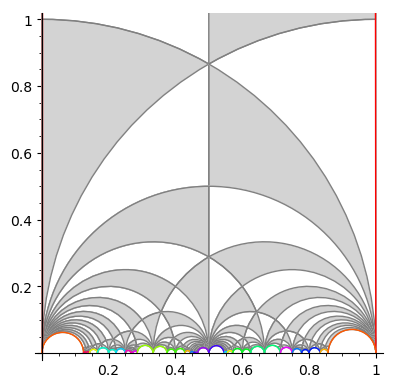

In [40]:
# the fundamental domain is the plot of the modular curve on the plane, with ssome sides identified
FareySymbol(G1_15).fundamental_domain()

The colors of the boundaries of the fundamental domain plot, tell us how the points should be indetified to produce the algebraic curve.

In [41]:
Gamma1(15).genus()  # the corresponding modular curve would be an elliptic curve

1

In [42]:
J1_15 = G1_15.modular_abelian_variety()  # get the modular curve
assert J1_15.conductor() == 15 


In [43]:
H_1 = J1_15.integral_homology(); H_1  # homology over C

Integral Homology of Abelian variety J1(15) of dimension 1

In [44]:
ell_curv = J1_15.elliptic_curve()  # elliptic curve representation

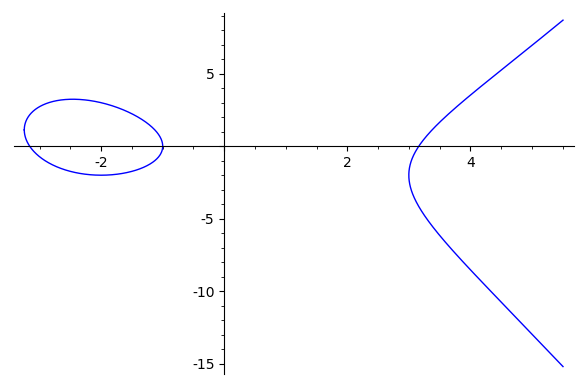

In [45]:
ell_curv.plot()

In [46]:
assert G1_15.genus() == G1_15.dimension_cusp_forms()

In [47]:
SL2Z.genus()

0

### Coverings and newforms

Can we ddefine maps between $X(N)$ and $X(M)$ for $M | N$? Yes annd these are the degeneracy maps ad geometrically corresponds to coverings:
    
$$\beta_t:X(\Gamma_0(N)) \to X(\Gamma_0(M)).$$
It is actually easier to build the section map:
$$\alpha_t:X(\Gamma_0(M)) \to X(\Gamma_0(N)), q \mapsto q^t,$$

where $t | N/M$. The section map called $\alpha_t$ and it is actually the one we are going to compute.

The image of $\alpha_t$ generates a subspace in $M_k(\Gamma_0(N))$ called the *new forms*. These forms will be eigenforms of the Hecke operators $T_p, p \nmid N$(see below). 

In [48]:
mf1 = ModularForms(66)
mf2 = ModularForms(22)

mf1.group()

Congruence Subgroup Gamma0(66)

In [49]:


mf2.degeneracy_map(mf1,t=3)  # there is also the inverse map, but it is not implemented yet

Hecke module morphism degeneracy map corresponding to f(q) |--> f(q^3) defined by the matrix
[ 0  0  1  0  0  0  0  0 -1  0  0  0  0  0  0  0]
[ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
Domain: Modular Forms space of dimension 5 for Congruence Subgroup Gamma0(22) ...
Codomain: Modular Forms space of dimension 16 for Congruence Subgroup Gamma0(66) ...

In [50]:
# the nnew form subspace
nf = mf1.new_subspace()
nf

Modular Forms subspace of dimension 3 of Modular Forms space of dimension 16 for Congruence Subgroup Gamma0(66) of weight 2 over Rational Field

In [51]:
nf.q_expansion_basis()

[
q + q^4 + q^5 + O(q^6),
q^2 - 2*q^5 + O(q^6),
q^3 - 3*q^5 + O(q^6)
]

### Period mappings

Let $f$ be a newform and $P\{\alpha,\beta\}$ a modular symbol. Given the above interpretation of modular symbols, we can hope to integrate the newform over a path on the modular curve (i.e. the standard pairing of homology and cohomology):

$$\Phi_f(P\{\alpha,\beta\}) = \langle f,\, P\{\alpha,\beta\} \rangle = \int_{\alpha}^{\beta} f(z) P(z,1) d z,$$

Newforms form a finite vector space within the cusp forms:

$$V_f = \mathbb C f_1 \oplus \cdots \oplus \mathbb C f_d \subset S_k(\Gamma)$$

$$\Phi_f : M_k(\Gamma) \to V_f^* = Hom_{\mathbb C}(V_f,\mathbb C), f \mapsto (f \mapsto \int_{\alpha}^{\beta} f(z) P(z,1) d z)$$

The newform abelian variety can then be defined as the period domai, i.e. the quotient of the ring generated by the cusp forms over the lattice of relations generated by the period mapping:

$$A_f(\mathbb C) = V_f^*/\Phi_f(S_k(\Gamma;\mathbb Z)).$$

In [52]:
ms = ModularSymbols(11, 2)
ms.gens()

((1,0), (1,8), (1,9))

In [53]:
cusp_sub = ms.cuspidal_submodule()

print(cusp_sub.gens())
periods = cusp_sub.integral_period_mapping()
periods.matrix()  # this matrix defines the lattice to quotient by to get A_f

((1,8), (1,9))


[  0 1/5]
[  1   0]
[  0   1]

In [54]:
periods.domain()

Modular Symbols space of dimension 3 for Gamma_0(11) of weight 2 with sign 0 over Rational Field

In [55]:
vary = cusp_sub.abelian_variety(); vary

Abelian variety J0(11) of dimension 1

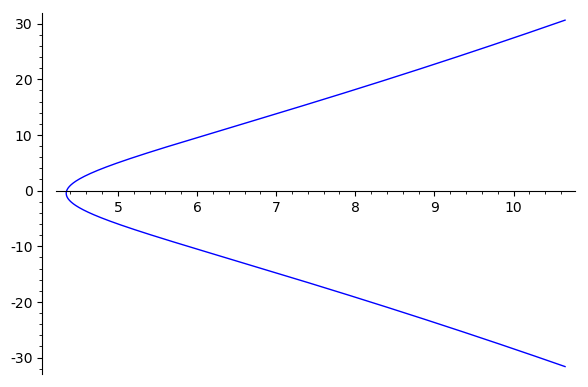

In [56]:
vary.elliptic_curve().plot()

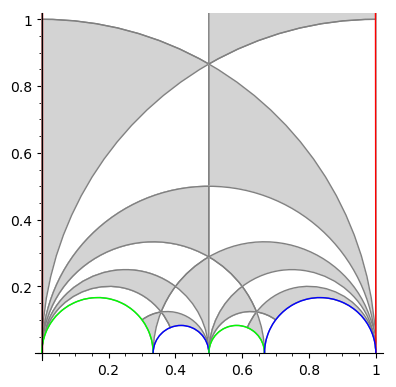

In [57]:
fs = FareySymbol(cusp_sub.group())
fs.fundamental_domain()

In [58]:
fs.cusps()

[0, Infinity]

## Hecke operators

Hecke operators $T_n$ can (almost) be defined over the Fourier expansion of a modular form:
$$a_1(T_n(f)) = a_n(f),$$
where $a_n(f)$ is the $n$-th Fourier coefficient of $f$.

There are many beautiful properties associated to these operators:
 0. Hecke operators are linear
 1. $T_n$ stabilise the space of cusp forms
 2. $T_n$ over eisenstein forms acts diagonally
 3. $T_n$ stabilised teh space of new forms
 4. Hecke operators commute
 
Furthermore, these operators can be represented as matrices over the space of modular forms.

In [59]:
mf = ModularForms(17,4,prec=12)

In [60]:
T2 = mf.hecke_operator(2)
T3 = mf.hecke_operator(3)
assert T3*T2 - T2*T3 == 0
T2

Hecke operator T_2 on Modular Forms space of dimension 6 for Congruence Subgroup Gamma0(17) of weight 4 over Rational Field

In [61]:
T2.charpoly().factor()

(x + 3) * (x - 9)^2 * (x^3 - x^2 - 24*x + 32)

In [62]:
T2.matrix()

[   0    8    0   -8    0    0]
[   1    0 -7/2    9    0    0]
[   0    0   -2   -4    0    0]
[   0    1 -5/2    0    0    0]
[   0    0    0    0    9    0]
[   0    0    0    0    0    9]

### Hecke-Eigenspaces

We see above that `T2` is block diagonal!
Does the second block corresponds to Eisenstein series?

In [63]:

ef = mf.eisenstein_subspace()

In [64]:
ef.hecke_matrix(2)  # indeed! with eigenvalue 9

[9 0]
[0 9]

Indeed we see here that the Eisenstein series are an eigenspace of Hecke operators. Is the complement the cusp forms?

In [65]:
cf = mf.cuspidal_subspace()
cf.hecke_matrix(2)

[   0    8    0   -8]
[   1    0 -7/2    9]
[   0    0   -2   -4]
[   0    1 -5/2    0]

In [66]:
# done properly
dec = T2.decomposition(); dec

[
Modular Forms subspace of dimension 1 of Modular Forms space of dimension 6 for Congruence Subgroup Gamma0(17) of weight 4 over Rational Field,
Modular Forms subspace of dimension 2 of Modular Forms space of dimension 6 for Congruence Subgroup Gamma0(17) of weight 4 over Rational Field,
Modular Forms subspace of dimension 3 of Modular Forms space of dimension 6 for Congruence Subgroup Gamma0(17) of weight 4 over Rational Field
]

In [67]:
[dec[i].gens() for i in range(len(dec))]

[[
 q - 3*q^2 - 8*q^3 + q^4 + 6*q^5 + 24*q^6 - 28*q^7 + 21*q^8 + 37*q^9 - 18*q^10 - 24*q^11 + O(q^12)
 ], [
 1 + O(q^12),
 q + 9*q^2 + 28*q^3 + 73*q^4 + 126*q^5 + 252*q^6 + 344*q^7 + 585*q^8 + 757*q^9 + 1134*q^10 + 1332*q^11 + O(q^12)
 ], [
 q + 16*q^4 - 6*q^5 - 40*q^6 + 16*q^7 - 8*q^8 + 39*q^9 - 32*q^10 - 28*q^11 + O(q^12),
 q^2 - 7*q^4 + 2*q^5 + 14*q^6 - 6*q^7 + q^8 - 18*q^9 + 8*q^10 + 20*q^11 + O(q^12),
 q^3 - 4*q^4 + 2*q^5 + 8*q^6 - 5*q^7 - 4*q^8 - 10*q^9 + 8*q^10 + 9*q^11 + O(q^12)
 ]]

We conclude that the two spaces are stabilised by the action of the Hecke operators.

We could also have checked the *modular symbol* spaces as well.

In [68]:
ms = mf.modular_symbols()
msc = ms.cuspidal_submodule()
[msc.T(i).matrix() for i in range(1,5)]

[
[1 0 0 0 0 0 0 0]  [ 25/2 -87/4     3  33/2 -67/4  65/4 -99/4 125/4]
[0 1 0 0 0 0 0 0]  [   14   -26    11    10   -19    20   -26    33]
[0 0 1 0 0 0 0 0]  [   14 -53/2    12    12 -43/2  35/2 -43/2  63/2]
[0 0 0 1 0 0 0 0]  [ 25/2 -97/4    13  13/2 -57/4  39/4 -49/4  99/4]
[0 0 0 0 1 0 0 0]  [ 17/2 -61/4     7   7/2 -25/4  11/4 -21/4  71/4]
[0 0 0 0 0 1 0 0]  [ 11/2 -45/4     7   1/2  -5/4  -5/4 -17/4  63/4]
[0 0 0 0 0 0 1 0]  [  9/2 -45/4     7  -1/2   7/4  -5/4 -21/4  55/4]
[0 0 0 0 0 0 0 1], [  3/2 -17/4     4  -7/2  11/4  -1/4  -5/4  15/4],

[    -8   77/2    -35     11  -31/2   29/2   21/2  -61/2]
[    -6     30    -31     14    -11      7      4     -9]
[   1/2   67/4    -24   25/2  -53/4   55/4  -57/4   67/4]
[     5    7/2    -12     11  -31/2   35/2  -63/2   75/2]
[  25/2  -61/4      3   25/2 -105/4  107/4 -177/4  215/4]
[  25/2  -91/4     18   -5/2  -55/4   69/4 -143/4  197/4]
[  -3/2   11/4      7  -19/2   -1/4   11/4  -17/4   15/4]
[  -7/2   21/4      1   -5/2    5/4   

### Hecke operators on homology

One can consider the induced action of the Hecke operators on thehomology of the modular curves $X(\Gamma_1(N))$. This is a example on how to do it.

In [69]:
G1_15 = Gamma1(15)
J1_15 = G1_15.modular_abelian_variety()

In [70]:
H_1 = J1_15.integral_homology(); H_1

Integral Homology of Abelian variety J1(15) of dimension 1

In [71]:
H_1.T(2).matrix()  # Hecke operator acting onhomology

[-1  0]
[ 0 -1]

In [72]:
mf = ModularForms(G1_15)
nf = mf.new_subspace()  # from a degeneracy map 3 --> 15


In [73]:
print(mf.T(2).charpoly().factor())
print(nf.T(2).charpoly().factor())  # 2 does not divide 15, hence the eigenspaces have all dimensions 1

(x - 1)^2 * (x - 3)^3 * (x + 1)^3 * (x^2 - 4*x + 5) * (x^2 - 2*x + 5) * (x^2 + 2*x + 5) * (x^2 + 4*x + 5)
(x + 1) * (x^2 - 4*x + 5) * (x^2 - 2*x + 5) * (x^2 + 2*x + 5) * (x^2 + 4*x + 5)


In [74]:
print(mf.T(5).charpoly().factor())
print(nf.T(5).charpoly().factor())  # since 3 | 15, the dimensios ofthe eigenspaces are not all 1

(x + 1)^2 * (x + 5)^2 * (x - 5)^5 * (x - 1)^7
(x - 5)^2 * (x + 1)^2 * (x + 5)^2 * (x - 1)^3


From the characteristic polynomial, we see that the space of new forms is composed of eigenspaces of the Hecke operator.

## Diamond operator

There is another kind of operators -- that is actually expresssible as a combination of Hecke operators -- that can help us understand the structure of the spce of modular forms: the *diamond operator*.

Given $d \in \mathbb Z/N\mathbb Z$ one can build a matrix in the modular group (or congruence subgroup) $((a,b),(c,d'))$ such that $((a,b),(c,d')) = ((d,0),(0,d^{-1}))$ $mod N$. The action of this matrix on the space of modular forms induce a decomposition of such space into eigenspaces for this action (the eigenspaces of the diamond operator!). 
For the subgroup $\Gamma_1(N)$, the eigenvalues are Dirichlet characters $\epsilon$, and the eiegnspaces are called $M_k(\Gamma_1(N),\epsilon)$.

In [75]:
NN = 7
mf = ModularForms(Gamma1(NN),2)

In [76]:
diamond = mf.diamond_bracket_operator(2)
morph = diamond.hecke_module_morphism()
morph

Hecke module morphism defined by the matrix
[  -47   -84  -420  -420 -1260]
[  -13   -24  -120  -115  -355]
[    2     4    19    18    57]
[    3     5    27    25    81]
[    1     2     9    10    26]
Domain: Modular Forms space of dimension 5 for Congruence Subgroup Gamma1(7) ...
Codomain: Modular Forms space of dimension 5 for Congruence Subgroup Gamma1(7) ...

In [77]:
morph.charpoly()

x^5 + x^4 + x^3 - x^2 - x - 1

In [78]:
DG = DirichletGroup(NN)
[m1,m2,m3,m4,m5,m6] = [ModularForms(eps, 2).diamond_bracket_matrix(2) for eps in DG]

In [79]:
m1.block_sum(m2).block_sum(m3).block_sum(m4).block_sum(m5).block_sum(m6).charpoly()

x^5 + x^4 + x^3 - x^2 - x - 1

We clearly see that the modular forms with characters are the blocks of the decomposition of the wholee space of modular forms.

## Dirichlet characters

A Dirichlet character is a multiplicative homorphism from the group $(\mathbb Z/N\mathbb Z)^\times \to \mathbb C$. All the characters together form the Dirichlet group $DG(N,\mathbb C)$. These very general objects are very important when studying the spaces of modular forms, because they are eigenvalues of the diamond operators.

#### Reminder
$$(\mathbb Z/N\mathbb Z)^\times = \{p \in \mathbb Z/N\mathbb Z | gcd(n,p)=1\}$$

### Modular form decompostions

The eigenspaces of the diamond operator decompose the space of modular forms as follows:

$$M_k(\Gamma_1(N)) = \bigoplus_{\epsilon \in DG(N,\mathbb C)}M_k(\Gamma_1(N),\epsilon)$$

The eigenvalues of such operators in each subspace is the Dirichlet character.

In [80]:
NN = 20
mf = ModularForms(Gamma1(NN),2)

In [81]:
DG = DirichletGroup(NN)
list(DG)

[Dirichlet character modulo 20 of conductor 1 mapping 11 |--> 1, 17 |--> 1,
 Dirichlet character modulo 20 of conductor 4 mapping 11 |--> -1, 17 |--> 1,
 Dirichlet character modulo 20 of conductor 5 mapping 11 |--> 1, 17 |--> zeta4,
 Dirichlet character modulo 20 of conductor 20 mapping 11 |--> -1, 17 |--> zeta4,
 Dirichlet character modulo 20 of conductor 5 mapping 11 |--> 1, 17 |--> -1,
 Dirichlet character modulo 20 of conductor 20 mapping 11 |--> -1, 17 |--> -1,
 Dirichlet character modulo 20 of conductor 5 mapping 11 |--> 1, 17 |--> -zeta4,
 Dirichlet character modulo 20 of conductor 20 mapping 11 |--> -1, 17 |--> -zeta4]

In [82]:
g = DG.0
g.values_on_gens()  # values of the charracter on the generators of Z/NZ

(-1, 1)

In [83]:
DG.gens()  # unique generator of the group

(Dirichlet character modulo 20 of conductor 4 mapping 11 |--> -1, 17 |--> 1,
 Dirichlet character modulo 20 of conductor 5 mapping 11 |--> 1, 17 |--> zeta4)

In [84]:
# they match the generators in Z/NZ
R = Integers(NN)
R.unit_gens()

(11, 17)

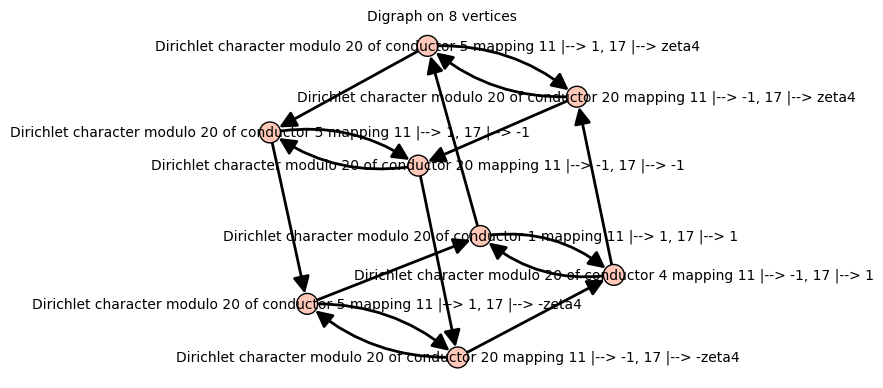

In [85]:
DG.cayley_graph()

The Galois group $Gal(\bar F/F)$ act on the characters by $(g \cdot \epsilon)(n) = g \dot (\epsilon(n))$, as $\epsilon(n) \in \bar F$.

In [86]:
DG.galois_orbits()

[
[Dirichlet character modulo 20 of conductor 20 mapping 11 |--> -1, 17 |--> -1],
[Dirichlet character modulo 20 of conductor 20 mapping 11 |--> -1, 17 |--> -zeta4, Dirichlet character modulo 20 of conductor 20 mapping 11 |--> -1, 17 |--> zeta4],
[Dirichlet character modulo 20 of conductor 4 mapping 11 |--> -1, 17 |--> 1],
[Dirichlet character modulo 20 of conductor 5 mapping 11 |--> 1, 17 |--> -1],
[Dirichlet character modulo 20 of conductor 5 mapping 11 |--> 1, 17 |--> -zeta4, Dirichlet character modulo 20 of conductor 5 mapping 11 |--> 1, 17 |--> zeta4],
[Dirichlet character modulo 20 of conductor 1 mapping 11 |--> 1, 17 |--> 1]
]

In [87]:
# the value of the characters on the generators of Z/NZ
eps1, eps2 = DG.0, DG.1
[(eps1(i), eps2(i)) for i in range(NN)]

[(0, 0),
 (1, 1),
 (0, 0),
 (-1, -zeta4),
 (0, 0),
 (0, 0),
 (0, 0),
 (-1, zeta4),
 (0, 0),
 (1, -1),
 (0, 0),
 (-1, 1),
 (0, 0),
 (1, -zeta4),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, zeta4),
 (0, 0),
 (-1, -1)]

In [88]:
M = ModularForms(eps2^3, 2); M

Modular Forms space of dimension 0, character [1, -zeta4] and weight 2 over Cyclotomic Field of order 4 and degree 2

In [89]:
M.character()

Dirichlet character modulo 20 of conductor 5 mapping 11 |--> 1, 17 |--> -zeta4

In [90]:
[ModularForms(eps, 2).dimension() for eps in DG]

[6, 0, 0, 5, 6, 0, 0, 5]

In [91]:
# decomposition theorem
assert mf.dimension() == sum([ModularForms(eps, 2).dimension() for eps in DG])

### Most general Eisenstein forms

The followin is the most general form for the Eisenstein series, where $\chi,\psi$ are Dirichlet characters and, if we are starting from $M_k(N,\epsilon)$, then $\epsilon = \chi\psi$.

$$ E_{k,\chi,\psi}(q) = c_0 + \sum_{m \geq 1} \left( \sum_{n|m} \psi(n) \cdot \chi(m/n) \cdot n^{k-1}\right) q^{m} \in \mathbb Q(\chi, \psi)[[q]],$$


In [92]:
E = EisensteinForms(Gamma1(13),2)
E.eisenstein_series()

[
1/2 + q + 3*q^2 + 4*q^3 + 7*q^4 + 6*q^5 + O(q^6),
-7/13*zeta6 - 11/13 + q + (2*zeta6 + 1)*q^2 + (-3*zeta6 + 1)*q^3 + (6*zeta6 - 3)*q^4 - 4*q^5 + O(q^6),
q + (zeta6 + 2)*q^2 + (-zeta6 + 3)*q^3 + (3*zeta6 + 3)*q^4 + 4*q^5 + O(q^6),
-zeta6 + q + (2*zeta6 - 1)*q^2 + (3*zeta6 - 2)*q^3 + (-2*zeta6 - 1)*q^4 + 6*q^5 + O(q^6),
q + (zeta6 + 1)*q^2 + (zeta6 + 2)*q^3 + (zeta6 + 2)*q^4 + 6*q^5 + O(q^6),
-1 + q - q^2 + 4*q^3 + 3*q^4 - 4*q^5 + O(q^6),
q + q^2 + 4*q^3 + 3*q^4 + 4*q^5 + O(q^6),
zeta6 - 1 + q + (-2*zeta6 + 1)*q^2 + (-3*zeta6 + 1)*q^3 + (2*zeta6 - 3)*q^4 + 6*q^5 + O(q^6),
q + (-zeta6 + 2)*q^2 + (-zeta6 + 3)*q^3 + (-zeta6 + 3)*q^4 + 6*q^5 + O(q^6),
7/13*zeta6 - 18/13 + q + (-2*zeta6 + 3)*q^2 + (3*zeta6 - 2)*q^3 + (-6*zeta6 + 3)*q^4 - 4*q^5 + O(q^6),
q + (-zeta6 + 3)*q^2 + (zeta6 + 2)*q^3 + (-3*zeta6 + 6)*q^4 + 4*q^5 + O(q^6)
]

In [93]:
[eis.parameters() for eis in E.eisenstein_series()]  # chi, psi, t of the Eisenstein series

[(Dirichlet character modulo 13 of conductor 1 mapping 2 |--> 1,
  Dirichlet character modulo 13 of conductor 1 mapping 2 |--> 1,
  13),
 (Dirichlet character modulo 13 of conductor 1 mapping 2 |--> 1,
  Dirichlet character modulo 13 of conductor 13 mapping 2 |--> zeta6,
  1),
 (Dirichlet character modulo 13 of conductor 13 mapping 2 |--> zeta6,
  Dirichlet character modulo 13 of conductor 1 mapping 2 |--> 1,
  1),
 (Dirichlet character modulo 13 of conductor 1 mapping 2 |--> 1,
  Dirichlet character modulo 13 of conductor 13 mapping 2 |--> zeta6 - 1,
  1),
 (Dirichlet character modulo 13 of conductor 13 mapping 2 |--> zeta6 - 1,
  Dirichlet character modulo 13 of conductor 1 mapping 2 |--> 1,
  1),
 (Dirichlet character modulo 13 of conductor 1 mapping 2 |--> 1,
  Dirichlet character modulo 13 of conductor 13 mapping 2 |--> -1,
  1),
 (Dirichlet character modulo 13 of conductor 13 mapping 2 |--> -1,
  Dirichlet character modulo 13 of conductor 1 mapping 2 |--> 1,
  1),
 (Dirichlet cha

## Appendix: Langlands correspondence


### The problem
We would like to know mor about $Gal(\bar{\mathbb Q}/\mathbb Q)$. 

$\mathbb Q^{ab}$ is the maximal abelian extension of $\mathbb Q$. That is the closest thing we know about $\bar {\mathbb Q}$.
$Gal(\mathbb Q^{ab}/\mathbb Q) = \lim_{N \to \infty} (\mathbb Z/N\mathbb Z)^x = \prod_p \mathbb Z_p$ the p-adic numbers!

Recall a p-adic number in $\mathbb Q_p$ is $\sum_{k \in \mathbb Z}a_kp^k$. $a_k \in \{0,1,…,p-1\}$. If $a_k=0$ for $k\leq 0$ we have the p-adic integers $\mathbb Z_p$. The valuation of a p-adic number is $|\frac{a}{b}p^k| = p^{-k}$

### Adèles ring $A_Q$: 
It is the direct product of all $\mathbb Q_p$ and $\mathbb R$ (i.e. all the completions of $\mathbb Q$, by *Ostrowski theorem*). We add the condition that all but a finite number of the elements in the direct product belong to $\mathbb Z_p$. Thus an Adèle can be $(1,1+3,5^2,…,0)$.
from the diagonal embedding $\mathbb Q \to A_Q,$ we can create the quotient $\mathbb Q\backslash A_Q ≃ \prod_p \mathbb Z_p \times (\mathbb R/\mathbb Z)$ compact and actually
$Gal(\mathbb Q^{ab}/\mathbb Q)$ is equivalent, as group, to the connected component to the identity of $\mathbb Q^\times\backslash A_Q^\times = \prod_p \mathbb Z_p^\times$, as the element in $\mathbb R/\mathbb Z$ parametrise the connected components. The group of invertible adèles is called idèles $A_Q^\times$.
One can generalise to a field $F$ and $O_F$ by creating the (p)-adic on all prime ideals. $A_F$ still makes sense.

### The abelian representation
Note that for any group $G$, the one-dimensional representations of $G$ are the same as those of its maximal abelian quotient. Thus — even if $Gal(\bar F/F)$ is non-abelian — the 1-dim representations of $Gal(\bar F/F)$ correspond to the maximal abelian quotient. Thus 1-dim representations of $Gal(\bar F/F)$ are in 1:1 with 1-dim representations of $Gal(F^{ab}/F) = F^\times\backslash A_F^\times$. Equivalently, the 1-dim representations of $Gal(\bar F/F)$, that is the representations of $GL_1(A_F^\times ) \to Aut(A_F^1)$ invariant under $GL_1(F)$, i.e. functions $GL_1(F)\backslash GL_1(A_F) \to \mathbb C$, as $GL_1(A_F)=A_F^\times$.

### Langlands correspondence: 
Can we generalise the reasonning from 1-dim to n-dim? 
n-dim representations of $Gal(\bar F/F)$ should then be representaitons of $GL_n(A_F^\times)$ as functions on $GL_n(F)\backslash GL_n(A_F)$ (i.e. automorphic forms!)
Under the Langlands correspondence, certain natural invariants attached to the Galois representations and to the automorphic representations need to be matched. These invariants are the *Frobenius conjugacy classes* on the Galois side and the *Hecke eigenvalues* on the automorphic side. 
#### Definition
A (discrete-series) automorphic representation for $G$ is an irreducible unitary subrepresentation of $L^2(G(F)\backslash G(A_F))$ 

#### E.G.
Consider $v:GL_2(\mathbb Q)\backslash GL_2(A_Q) \to \mathbb C$. The action of $GL_2(\mathbb Q)$ is defined as
$$g.v(h) = v(hg),g \in GL_2(\mathbb Q), h \in GL_2(A_Q)$$
which is nasty…
A function here is a nasty object since it has many components as $GL_2(A_Q) = \prod_p’GL_2(\mathbb Q_p)$. But it can be split into the tensor product on each $\mathbb Q_p$ factor: the functional space becomes
$$\pi = \bigotimes_p \pi_p  \otimes \pi_\infty .$$ 
This is possible because the action of $GL_2(\mathbb Q)$ does not mix the components (recall that $\mathbb Q \to A_Q$ diagonally!)

### Relation to Hecke Operators
On the automorphic side, we have that the representation $GL_2(\mathbb Q)\backslash GL_2(A_Q) \to \mathbb C$ of automorphic forms is equivalent to (**strong approx theorem**):
$$Γ_0(N)\backslash SL_2(\mathbb R) \to \mathbb C$$ 
And here are the modular forms!
So $\pi = \bigotimes_p \pi_p  \otimes \pi_\infty$ is the space of irreducible representations of the automorphic forms (this is a function space). The functions $v_p \in \pi$ are invariants in each $\pi_p$ under $GL_2(\mathbb Z_p)$ -- this group is the diagonal embedding of $GL_2(\mathbb Q)$ -- (i.e. $g.v_p(h)=v_p(hg)=v_p(h)$ for $g \in GL_2(\mathbb Z_p)$ ) because they are unramified or subgroup mod $p^{n_p}$ for the ramified pts.

#### Obs: modular forms
The action of $g \in GL_2(\mathbb Q)$ on an automorphic representation is: $(g.f)(h)=f(hg)$.

Action of $sl_2$ on $\pi_\infty$: this implies that the we can decompose it into a direct sum of highest weights reps (of h.w. $k$). Let $\phi_\pi$ the function $SL_2(\mathbb R) \to \mathbb C$ corresponding to h.w. vector $v_\infty$, and for $g \in Γ_0(N)$, $g.\phi_\pi (h) = \phi_\pi(g.h) (ch + d)^k$, hence, modular form of weight $k$!
#### Obs: Hecke operators
Being associated to the highest weight representations, modular forms contain all the info on the representation $\pi$.
Each of the $v_p$’s forming $\pi$ are invariant under $GL_2(\mathbb Z_p)$. Thus they are eigenvectors of the Hecke spherical algebra (and the $\pi_p$ the eigenspaces): it is the algebra of functions $GL_2(\mathbb Q_p) \to \mathbb C$ bi-invariant under $GL_2(\mathbb Z_p)$ with convolution product.
This algebra is isomorphic to the polynomial algebra in two generators $H_{1,p}$ and $H_{2,p}$, whose action on $v_p$ is given by the formulas
$$H_{1,p}v_p = \int_{M21(\mathbb Z_p)} \rho_p(g)v_p dg,$$ 
$$H_{2,p}v_p = \int_{M22(\mathbb Z_p)} \rho_p(g)v_p dg, $$
$\rho_p:GL_2(\mathbb Z_p) \to End \pi_p$ is the representation
$$M21(\mathbb Z_p) = GL_2(\mathbb Z_p) ((p, 0),(0, 1)) GL_2(\mathbb Z_p), $$
$$M22(\mathbb Z_p) = GL_2(\mathbb Z_p) ((p, 0),(0, p)) GL_2(\mathbb Z_p)$$

Since $H_{i,p}v_p$ is defined on a coset, it is $GL_2(\mathbb Z_p)$ invariant and thus proportional to $v_p$. Hence the importance of the eigenvalue. On $\phi_\pi$, $H_{i,p}$ act as the standard Hecke operators.




### Galois side: action on Etale cohomology of elliptic curve

The group $Gal(\bar{\mathbb Q}/ \mathbb Q) $  acts on $H^1_{et}(E_{\bar{\mathbb Q}},\mathbb Q_l)=\mathbb Q_i^2$ the étale cohomology of the Elliptic curve $E$ defined over $\mathbb Q$. Thus we can deduce a representation of

$$\sigma_{E,l} : Gal(\bar{ \mathbb Q}/\mathbb Q) \to GL_2(\mathbb Q_l).$$ 

the Langlands matching condition is that $Tr_{\sigma_E}(Fr_p)=p+1-\#E(F_p)$ should be equal to the eigenvalue $h_{1,p}$ of the normalised Hecke operator $H_{1,p}$, at all primes $p$ where $\sigma_E$ and $\pi(\sigma_E)$ are unramified. More concretely, the eigenvalues are the Fourier coefficient of the modular cusp form $\phi_\pi$, hence there exists a modular cusp form $\phi_E(q) = \sum_n^\infty a_nq^n$ with $a_1 = 1$ (normalisation) and $a_p = p+1−\#E(F_p)$ 
for all but finitely many primes $p$. This implies the Fermat last theorem!

In [94]:
# let's compute the Hecke eigenvalues for N = 11
mf = ModularForms(11, 2)
cf = mf.cuspidal_subspace()  # for the string approx. thm., this is equivalent to GL_2(ℚ)∖GL_2(A_Q)
T2 = mf.hecke_operator(2)
T2.matrix()

[-2  0]
[ 0  3]

In [95]:
mf.group()

Congruence Subgroup Gamma0(11)

In [96]:
variety = mf.group().modular_abelian_variety()
ell = variety.elliptic_curve()  # this is the elliptic curve, where we want to represent Gal(cl(Q)/Q) over its H^1
ell

Elliptic Curve defined by y^2 + y = x^3 - x^2 - 10*x - 20 over Rational Field

In [97]:
ell.automorphisms()

[Generic endomorphism of Abelian group of points on Elliptic Curve defined by y^2 + y = x^3 - x^2 - 10*x - 20 over Rational Field
   Via:  (u,r,s,t) = (-1, 0, 0, -1),
 Generic endomorphism of Abelian group of points on Elliptic Curve defined by y^2 + y = x^3 - x^2 - 10*x - 20 over Rational Field
   Via:  (u,r,s,t) = (1, 0, 0, 0)]

In [98]:
import numpy as np
list_of_traces = [-2]
for p in primes(3,43):
    try:
        mat = ell.matrix_of_frobenius(p)  # over p-adic
        tr = mat.trace()  # over p-adic
        list_of_traces.append(QQ(tr))
    except ArithmeticError:
        list_of_traces.append(np.nan)
list_of_traces

[-2, -1, 1, -2, nan, 4, -2, nan, -1, nan, 7, 3, -8]

In [99]:
# to give an example of the Fr_p  2x2 matrix acting on the p-adic cohomology
mat

[        5*41 + 32*41^2 + 35*41^3 + 27*41^4 + 5*41^5 + 34*41^6 + 11*41^7 + 37*41^8 + 17*41^9 + 18*41^10 + 41^11 + 2*41^12 + 25*41^13 + 23*41^14 + 41^15 + 35*41^16 + 35*41^17 + 27*41^18 + 9*41^19 + 28*41^20 + O(41^21) 4*41 + 22*41^2 + 11*41^3 + 19*41^4 + 40*41^5 + 31*41^6 + 35*41^7 + 17*41^8 + 34*41^9 + 13*41^10 + 30*41^11 + 10*41^12 + 15*41^13 + 33*41^14 + 19*41^15 + 6*41^16 + 14*41^17 + 13*41^18 + 18*41^19 + 15*41^20 + O(41^21)]
[        32*41 + 20*41^2 + 11*41^3 + 23*41^4 + 41^5 + 8*41^6 + 3*41^7 + 37*41^8 + 4*41^9 + 6*41^10 + 12*41^11 + 28*41^12 + 41^13 + 12*41^14 + 17*41^15 + 40*41^16 + 11*41^17 + 24*41^18 + 34*41^19 + 34*41^20 + O(41^21)           33 + 35*41 + 8*41^2 + 5*41^3 + 13*41^4 + 35*41^5 + 6*41^6 + 29*41^7 + 3*41^8 + 23*41^9 + 22*41^10 + 39*41^11 + 38*41^12 + 15*41^13 + 17*41^14 + 39*41^15 + 5*41^16 + 5*41^17 + 13*41^18 + 31*41^19 + O(41^20)]

In [100]:
# very that the trace is p + 1 - N_p
[p+1-ell.Np(p) for p in primes(43)]

[-2, -1, 1, -2, 1, 4, -2, 0, -1, 0, 7, 3, -8]

In [101]:
[cf.T(p)[0, 0] for p in primes(43)]  # as predicted by the Langlands correspondence

[-2, -1, 1, -2, 1, 4, -2, 0, -1, 0, 7, 3, -8]

### Recap on Langlands in 2-dim

We have two sides of the correspondence: the Glois group side and the automorphic side.

Over the automorphic side -- which corresponds to the spaces of modular forms thanks to the strong approximation theorem -- we are interested to understand how the Hecke operators act on the cusp subspace.


Over the Galois group side, we are interested in computing the Frobenius morphisms over a certain representation. The space over which to represent $Fr_p$ is the cohomology of the modular curve. The modular curve is really the space where the modular forms are defined.

The Langlands correspondence asserts that

$$Tr(Fr_p) = Eigval(T_p)$$